In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [13]:
dataset = pd.read_excel(r'D:\Results-Azad.xlsx')

In [14]:
dataset

,Name,Gender,City,Month,Day,Q1-a,Q1-b,Q1-c,Q1-d,Q1-e,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60
0,User 1,0,300,8,2,3,2,1,4,5,...,10,50,50,80,60,5,5,25,7,80
1,User 2,0,600,8,17,1,3,2,4,5,...,80,60,60,60,40,10,10,75,40,70
2,User 3,1,1125,1,23,4,5,1,2,3,...,0,0,0,50,50,75,10,25,75,90
3,User 4,1,300,8,29,2,3,4,5,1,...,0,20,100,0,10,0,0,10,80,30
4,User 5,0,300,9,16,1,2,3,5,4,...,20,60,60,60,60,90,60,10,60,70
5,User 6,0,300,9,16,3,2,1,5,4,...,40,10,20,20,10,35,35,0,70,0
6,User 7,0,430,11,2,3,4,2,1,5,...,40,60,60,70,70,50,40,70,70,60
7,User 8,0,300,6,8,1,2,3,4,5,...,20,30,0,30,50,0,0,0,60,60
8,User 9,0,300,8,5,1,5,4,3,2,...,20,0,80,60,60,30,30,5,5,80
9,User 10,1,300,1,24,1,3,4,5,2,...,20,50,70,20,20,50,0,100,50,50


In [17]:
dataset

,Name,Gender,City,Month,Day,Q1-a,Q1-b,Q1-c,Q1-d,Q1-e,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60
0,User 1,0,300,8,2,3,2,1,4,5,...,10,50,50,80,60,5,5,25,7,80
1,User 2,0,600,8,17,1,3,2,4,5,...,80,60,60,60,40,10,10,75,40,70
2,User 3,1,1125,1,23,4,5,1,2,3,...,0,0,0,50,50,75,10,25,75,90
3,User 4,1,300,8,29,2,3,4,5,1,...,0,20,100,0,10,0,0,10,80,30
4,User 5,0,300,9,16,1,2,3,5,4,...,20,60,60,60,60,90,60,10,60,70
5,User 6,0,300,9,16,3,2,1,5,4,...,40,10,20,20,10,35,35,0,70,0
6,User 7,0,430,11,2,3,4,2,1,5,...,40,60,60,70,70,50,40,70,70,60
7,User 8,0,300,6,8,1,2,3,4,5,...,20,30,0,30,50,0,0,0,60,60
8,User 9,0,300,8,5,1,5,4,3,2,...,20,0,80,60,60,30,30,5,5,80
9,User 10,1,300,1,24,1,3,4,5,2,...,20,50,70,20,20,50,0,100,50,50


In [19]:
dataset_striped= dataset.drop('Name',inplace=True,axis=1)

,Gender,City,Month,Day,Q1-a,Q1-b,Q1-c,Q1-d,Q1-e,Q2-a,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60
0,0,300,8,2,3,2,1,4,5,5,...,10,50,50,80,60,5,5,25,7,80
1,0,600,8,17,1,3,2,4,5,5,...,80,60,60,60,40,10,10,75,40,70
2,1,1125,1,23,4,5,1,2,3,4,...,0,0,0,50,50,75,10,25,75,90
3,1,300,8,29,2,3,4,5,1,4,...,0,20,100,0,10,0,0,10,80,30
4,0,300,9,16,1,2,3,5,4,5,...,20,60,60,60,60,90,60,10,60,70
5,0,300,9,16,3,2,1,5,4,3,...,40,10,20,20,10,35,35,0,70,0
6,0,430,11,2,3,4,2,1,5,3,...,40,60,60,70,70,50,40,70,70,60
7,0,300,6,8,1,2,3,4,5,1,...,20,30,0,30,50,0,0,0,60,60
8,0,300,8,5,1,5,4,3,2,3,...,20,0,80,60,60,30,30,5,5,80
9,1,300,1,24,1,3,4,5,2,4,...,20,50,70,20,20,50,0,100,50,50


In [23]:
dataset_striped= dataset.drop('Gender',inplace=True,axis=1)

In [24]:
dataset_striped= dataset.drop('City',inplace=True,axis=1)

In [25]:
dataset_striped= dataset.drop('Month',inplace=True,axis=1)

In [26]:
dataset_striped= dataset.drop('Day',inplace=True,axis=1)

In [30]:
dataset

,Q1-a,Q1-b,Q1-c,Q1-d,Q1-e,Q2-a,Q2-b,Q2-c,Q2-d,Q2-e,Q3-a,Q3-b,Q3-c,Q3-d,Q3-e,Q4-a,Q4-b,Q4-c,Q4-d,Q4-e,Q5-a,Q5-b,Q5-c,Q5-d,Q5-e,Q6-a,Q6-b,Q6-c,Q6-d,Q6-e,Q7-a,Q7-b,Q7-c,Q7-d,Q7-e,Q8-a,Q8-b,Q8-c,Q8-d,Q8-e,Q9-a,Q9-b,Q9-c,Q9-d,Q9-e,Q10-a,Q10-b,Q10-c,Q10-d,Q10-e,Q11-a,Q11-b,Q11-c,Q11-d,Q11-e,Q12-a,Q12-b,Q12-c,Q12-d,Q12-e,Q13-a,Q13-b,Q13-c,Q13-d,Q13-e,Q14-a,Q14-b,Q14-c,Q14-d,Q14-e,Q15-a,Q15-b,Q15-c,Q15-d,Q15-e,Q16-a,Q16-b,Q16-c,Q16-d,Q16-e,Q17-a,Q17-b,Q17-c,Q17-d,Q17-e,Q18-a,Q18-b,Q18-c,Q18-d,Q18-e,Q19-a,Q19-b,Q19-c,Q19-d,Q19-e,Q20-a,Q20-b,Q20-c,Q20-d,Q20-e,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60
0,3,2,1,4,5,5,4,1,3,2,5,2,3,1,4,2,1,4,5,3,5,4,3,1,2,3,1,2,4,5,1,4,3,2,5,5,2,1,4,3,1,5,3,2,4,5,2,1,4,3,4,5,3,2,1,4,5,3,1,2,1,3,5,2,4,2,3,4,5,1,5,3,4,2,1,5,2,4,3,1,2,1,3,5,4,3,2,1,5,4,4,5,3,1,2,2,3,1,5,4,0,0,1,1,0,1,1,1,1,1,0,1,0,0,1,0,0,0,0,1,70,70,80,100,30,20,30,0,60,70,10,50,50,80,60,5,5,25,7,80
1,1,3,2,4,5,5,4,2,1,3,5,2,3,1,4,1,3,4,2,5,5,4,2,3,1,5,3,2,4,1,5,2,3,1,4,5,2,3,1,4,1,4,3,5,2,5,1,3,4,2,3,4,2,1,5,3,4,1,2,5,1,4,5,2,3,3,2,5,1,4,5,4,3,2,1,5,3,2,1,4,1,3,2,4,5,2,4,3,1,5,3,4,2,1,5,5,4,2,1,3,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0,1,60,70,65,90,70,60,70,60,80,90,80,60,60,60,40,10,10,75,40,70
2,4,5,1,2,3,4,2,3,1,5,5,2,4,3,1,1,4,3,5,2,3,4,2,5,1,3,1,2,5,4,1,3,4,2,5,1,3,4,2,5,2,4,3,1,5,5,1,2,3,4,3,5,4,2,1,5,1,2,3,4,4,5,1,3,2,1,5,4,3,2,4,3,5,2,1,2,3,5,4,1,3,2,1,5,4,5,4,1,2,3,4,1,3,2,5,3,5,2,1,4,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,1,50,25,90,90,75,0,10,50,50,0,0,0,0,50,50,75,10,25,75,90
3,2,3,4,5,1,4,1,2,5,3,3,4,5,2,1,3,2,1,4,5,4,2,1,5,3,5,1,2,4,3,3,4,2,5,1,2,5,3,4,1,5,1,2,4,3,4,5,2,3,1,3,5,2,1,4,1,2,3,5,4,5,4,2,3,1,5,3,1,4,2,1,2,3,4,5,4,2,1,5,3,1,5,3,4,2,1,3,4,5,2,3,1,4,5,2,2,3,5,4,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,70,40,50,100,50,60,50,30,90,30,0,20,100,0,10,0,0,10,80,30
4,1,2,3,5,4,5,1,3,2,4,4,5,1,2,3,3,5,2,1,4,3,4,2,5,1,5,2,1,4,3,1,5,2,4,3,2,3,1,4,5,4,2,5,1,3,3,5,2,4,1,2,3,1,4,5,5,1,4,3,2,1,4,2,5,3,1,4,3,5,2,1,4,3,2,5,1,3,5,4,2,1,2,3,4,5,4,2,1,5,3,4,1,3,2,5,5,3,1,4,2,1,1,1,1,0,1,0,0,1,1,1,1,1,0,1,1,1,0,0,0,30,30,20,80,70,80,60,30,80,50,20,60,60,60,60,90,60,10,60,70
5,3,2,1,5,4,3,4,1,2,5,5,4,1,3,2,3,2,1,4,5,5,4,2,3,1,1,5,3,2,4,4,1,2,3,5,5,3,1,2,4,1,5,4,3,2,5,3,1,2,4,3,4,2,1,5,5,3,2,4,1,5,4,1,2,3,3,5,2,1,4,2,5,1,4,3,2,4,1,3,5,1,2,5,3,4,3,2,1,4,5,1,3,4,2,5,4,3,5,2,1,0,1,1,1,0,1,0,0,0,1,1,1,1,0,1,0,1,1,1,0,30,20,30,40,100,20,95,20,90,80,40,10,20,20,10,35,35,0,70,0
6,3,4,2,1,5,3,2,4,1,5,3,2,1,5,4,2,1,4,5,3,3,2,4,5,1,5,4,1,3,2,3,2,4,1,5,5,2,3,1,4,1,4,2,5,3,3,1,2,4,5,2,3,1,4,5,4,1,5,3,2,1,2,3,4,5,1,2,5,3,4,2,3,5,1,4,1,2,3,5,4,1,2,4,5,3,1,4,5,3,2,4,2,3,1,5,5,1,2,3,4,1,1,0,1,0,0,1,1,1,1,0,1,0,0,1,1,1,0,0,1,50,80,90,90,80,80,60,80,50,70,40,60,60,70,70,50,40,70,70,60
7,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,5,4,3,2,2,1,3,4,5,5,4,3,2,1,4,1,2,3,5,4,1,2,3,5,1,2,3,4,5,1,3,2,5,4,2,3,4,5,1,2,3,1,4,5,1,2,4,3,5,1,2,4,5,3,5,3,4,1,2,2,3,5,1,4,1,2,4,5,3,1,2,3,4,5,2,3,5,4,1,1,2,3,4,5,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,100,10,100,100,50,90,80,50,40,10,20,30,0,30,50,0,0,0,60,60
8,1,5,4,3,2,3,2,5,1,4,5,4,2,1,3,1,4,5,3,2,3,4,5,1,2,1,5,2,3,4,3,1,4,2,5,1,3,4,2,5,1,4,3,2,5,4,1,3,2,5,4,3,5,1,2,1,3,5,4,2,1,3,4,2,5,3,2,4,1,5,3,4,2,5,1,1,5,3,4,2,2,1,5,4,3,1,5,3,2,4,3,1,5,2,4,3,2,1,4,5,1,1,1,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,1,80,30,90,90,20,5,80,70,90,20,20,0,80,60,60,30,30,5,5,80
9,1,3,4,5,2,4,3,2,1,5,3,4,2,1,1,2,4,5,3,1,3,5,4,2,1,5,4,3,1,2,3,4,2,1,5,4,2,5,1,3,2,5,3,1,4,5,2,3,1,3,2,4,5,1,3,1,5,3,2,4,1,2,4,3,5,1,5,3,4,2,5,3,4,2,1,1,5,2,3,4,2,1,3,5,4,1,3,2,4,5,5,1,4,2,3,5,3,4,2,1,1,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,50,50,10,80,80,90,40,20,85,50,20,50,70,20,20,50,0,100,50,50


In [28]:
pd.set_option('display.max_columns',None)

In [29]:
pd.set_option('display.max_rows', None)

In [1]:
%matplotlib inline

In [32]:
dataset.head()

,Q1-a,Q1-b,Q1-c,Q1-d,Q1-e,Q2-a,Q2-b,Q2-c,Q2-d,Q2-e,Q3-a,Q3-b,Q3-c,Q3-d,Q3-e,Q4-a,Q4-b,Q4-c,Q4-d,Q4-e,Q5-a,Q5-b,Q5-c,Q5-d,Q5-e,Q6-a,Q6-b,Q6-c,Q6-d,Q6-e,Q7-a,Q7-b,Q7-c,Q7-d,Q7-e,Q8-a,Q8-b,Q8-c,Q8-d,Q8-e,Q9-a,Q9-b,Q9-c,Q9-d,Q9-e,Q10-a,Q10-b,Q10-c,Q10-d,Q10-e,Q11-a,Q11-b,Q11-c,Q11-d,Q11-e,Q12-a,Q12-b,Q12-c,Q12-d,Q12-e,Q13-a,Q13-b,Q13-c,Q13-d,Q13-e,Q14-a,Q14-b,Q14-c,Q14-d,Q14-e,Q15-a,Q15-b,Q15-c,Q15-d,Q15-e,Q16-a,Q16-b,Q16-c,Q16-d,Q16-e,Q17-a,Q17-b,Q17-c,Q17-d,Q17-e,Q18-a,Q18-b,Q18-c,Q18-d,Q18-e,Q19-a,Q19-b,Q19-c,Q19-d,Q19-e,Q20-a,Q20-b,Q20-c,Q20-d,Q20-e,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60
0,3,2,1,4,5,5,4,1,3,2,5,2,3,1,4,2,1,4,5,3,5,4,3,1,2,3,1,2,4,5,1,4,3,2,5,5,2,1,4,3,1,5,3,2,4,5,2,1,4,3,4,5,3,2,1,4,5,3,1,2,1,3,5,2,4,2,3,4,5,1,5,3,4,2,1,5,2,4,3,1,2,1,3,5,4,3,2,1,5,4,4,5,3,1,2,2,3,1,5,4,0,0,1,1,0,1,1,1,1,1,0,1,0,0,1,0,0,0,0,1,70,70,80,100,30,20,30,0,60,70,10,50,50,80,60,5,5,25,7,80
1,1,3,2,4,5,5,4,2,1,3,5,2,3,1,4,1,3,4,2,5,5,4,2,3,1,5,3,2,4,1,5,2,3,1,4,5,2,3,1,4,1,4,3,5,2,5,1,3,4,2,3,4,2,1,5,3,4,1,2,5,1,4,5,2,3,3,2,5,1,4,5,4,3,2,1,5,3,2,1,4,1,3,2,4,5,2,4,3,1,5,3,4,2,1,5,5,4,2,1,3,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0,1,60,70,65,90,70,60,70,60,80,90,80,60,60,60,40,10,10,75,40,70
2,4,5,1,2,3,4,2,3,1,5,5,2,4,3,1,1,4,3,5,2,3,4,2,5,1,3,1,2,5,4,1,3,4,2,5,1,3,4,2,5,2,4,3,1,5,5,1,2,3,4,3,5,4,2,1,5,1,2,3,4,4,5,1,3,2,1,5,4,3,2,4,3,5,2,1,2,3,5,4,1,3,2,1,5,4,5,4,1,2,3,4,1,3,2,5,3,5,2,1,4,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,1,50,25,90,90,75,0,10,50,50,0,0,0,0,50,50,75,10,25,75,90
3,2,3,4,5,1,4,1,2,5,3,3,4,5,2,1,3,2,1,4,5,4,2,1,5,3,5,1,2,4,3,3,4,2,5,1,2,5,3,4,1,5,1,2,4,3,4,5,2,3,1,3,5,2,1,4,1,2,3,5,4,5,4,2,3,1,5,3,1,4,2,1,2,3,4,5,4,2,1,5,3,1,5,3,4,2,1,3,4,5,2,3,1,4,5,2,2,3,5,4,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,70,40,50,100,50,60,50,30,90,30,0,20,100,0,10,0,0,10,80,30
4,1,2,3,5,4,5,1,3,2,4,4,5,1,2,3,3,5,2,1,4,3,4,2,5,1,5,2,1,4,3,1,5,2,4,3,2,3,1,4,5,4,2,5,1,3,3,5,2,4,1,2,3,1,4,5,5,1,4,3,2,1,4,2,5,3,1,4,3,5,2,1,4,3,2,5,1,3,5,4,2,1,2,3,4,5,4,2,1,5,3,4,1,3,2,5,5,3,1,4,2,1,1,1,1,0,1,0,0,1,1,1,1,1,0,1,1,1,0,0,0,30,30,20,80,70,80,60,30,80,50,20,60,60,60,60,90,60,10,60,70


In [34]:
dataset_scaled = normalize(dataset)

In [36]:
dataset_scaled = pd.DataFrame(dataset_scaled,columns=dataset.columns)

In [37]:
dataset_scaled


,Q1-a,Q1-b,Q1-c,Q1-d,Q1-e,Q2-a,Q2-b,Q2-c,Q2-d,Q2-e,Q3-a,Q3-b,Q3-c,Q3-d,Q3-e,Q4-a,Q4-b,Q4-c,Q4-d,Q4-e,Q5-a,Q5-b,Q5-c,Q5-d,Q5-e,Q6-a,Q6-b,Q6-c,Q6-d,Q6-e,Q7-a,Q7-b,Q7-c,Q7-d,Q7-e,Q8-a,Q8-b,Q8-c,Q8-d,Q8-e,Q9-a,Q9-b,Q9-c,Q9-d,Q9-e,Q10-a,Q10-b,Q10-c,Q10-d,Q10-e,Q11-a,Q11-b,Q11-c,Q11-d,Q11-e,Q12-a,Q12-b,Q12-c,Q12-d,Q12-e,Q13-a,Q13-b,Q13-c,Q13-d,Q13-e,Q14-a,Q14-b,Q14-c,Q14-d,Q14-e,Q15-a,Q15-b,Q15-c,Q15-d,Q15-e,Q16-a,Q16-b,Q16-c,Q16-d,Q16-e,Q17-a,Q17-b,Q17-c,Q17-d,Q17-e,Q18-a,Q18-b,Q18-c,Q18-d,Q18-e,Q19-a,Q19-b,Q19-c,Q19-d,Q19-e,Q20-a,Q20-b,Q20-c,Q20-d,Q20-e,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60
0,0.012224,0.008149,0.004075,0.016298,0.020373,0.020373,0.016298,0.004075,0.012224,0.008149,0.020373,0.008149,0.012224,0.004075,0.016298,0.008149,0.004075,0.016298,0.020373,0.012224,0.020373,0.016298,0.012224,0.004075,0.008149,0.012224,0.004075,0.008149,0.016298,0.020373,0.004075,0.016298,0.012224,0.008149,0.020373,0.020373,0.008149,0.004075,0.016298,0.012224,0.004075,0.020373,0.012224,0.008149,0.016298,0.020373,0.008149,0.004075,0.016298,0.012224,0.016298,0.020373,0.012224,0.008149,0.004075,0.016298,0.020373,0.012224,0.004075,0.008149,0.004075,0.012224,0.020373,0.008149,0.016298,0.008149,0.012224,0.016298,0.020373,0.004075,0.020373,0.012224,0.016298,0.008149,0.004075,0.020373,0.008149,0.016298,0.012224,0.004075,0.008149,0.004075,0.012224,0.020373,0.016298,0.012224,0.008149,0.004075,0.020373,0.016298,0.016298,0.020373,0.012224,0.004075,0.008149,0.008149,0.012224,0.004075,0.020373,0.016298,0.000000,0.000000,0.004075,0.004075,0.000000,0.004075,0.004075,0.004075,0.004075,0.004075,0.000000,0.004075,0.000000,0.000000,0.004075,0.000000,0.000000,0.000000,0.000000,0.004075,0.285218,0.285218,0.325964,0.407455,0.122236,0.081491,0.122236,0.000000,0.244473,0.285218,0.040745,0.203727,0.203727,0.325964,0.244473,0.020373,0.020373,0.101864,0.028522,0.325964
1,0.003439,0.010317,0.006878,0.013756,0.017195,0.017195,0.013756,0.006878,0.003439,0.010317,0.017195,0.006878,0.010317,0.003439,0.013756,0.003439,0.010317,0.013756,0.006878,0.017195,0.017195,0.013756,0.006878,0.010317,0.003439,0.017195,0.010317,0.006878,0.013756,0.003439,0.017195,0.006878,0.010317,0.003439,0.013756,0.017195,0.006878,0.010317,0.003439,0.013756,0.003439,0.013756,0.010317,0.017195,0.006878,0.017195,0.003439,0.010317,0.013756,0.006878,0.010317,0.013756,0.006878,0.003439,0.017195,0.010317,0.013756,0.003439,0.006878,0.017195,0.003439,0.013756,0.017195,0.006878,0.010317,0.010317,0.006878,0.017195,0.003439,0.013756,0.017195,0.013756,0.010317,0.006878,0.003439,0.017195,0.010317,0.006878,0.003439,0.013756,0.003439,0.010317,0.006878,0.013756,0.017195,0.006878,0.013756,0.010317,0.003439,0.017195,0.010317,0.013756,0.006878,0.003439,0.017195,0.017195,0.013756,0.006878,0.003439,0.010317,0.000000,0.003439,0.000000,0.000000,0.003439,0.000000,0.003439,0.000000,0.000000,0.003439,0.000000,0.003439,0.003439,0.000000,0.000000,0.000000,0.003439,0.003439,0.000000,0.003439,0.206334,0.240723,0.223529,0.309501,0.240723,0.206334,0.240723,0.206334,0.275112,0.309501,0.275112,0.206334,0.206334,0.206334,0.137556,0.034389,0.034389,0.257918,0.137556,0.240723
2,0.016868,0.021085,0.004217,0.008434,0.012651,0.016868,0.008434,0.012651,0.004217,0.021085,0.021085,0.008434,0.016868,0.012651,0.004217,0.004217,0.016868,0.012651,0.021085,0.008434,0.012651,0.016868,0.008434,0.021085,0.004217,0.012651,0.004217,0.008434,0.021085,0.016868,0.004217,0.012651,0.016868,0.008434,0.021085,0.004217,0.012651,0.016868,0.008434,0.021085,0.008434,0.016868,0.012651,0.004217,0.021085,0.021085,0.004217,0.008434,0.012651,0.016868,0.012651,0.021085,0.016868,0.008434,0.004217,0.021085,0.004217,0.008434,0.012651,0.016868,0.016868,0.021085,0.004217,0.012651,0.008434,0.004217,0.021085,0.016868,0.012651,0.008434,0.016868,0.012651,0.021085,0.008434,0.004217,0.008434,0.012651,0.021085,0.016868,0.004217,0.012651,0.008434,0.004217,0.021085,0.

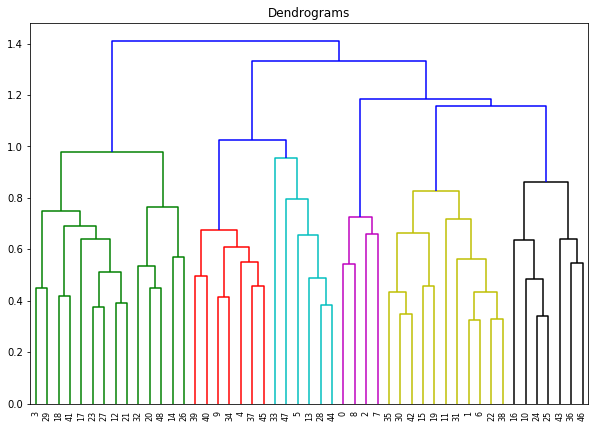

In [40]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dataset_scaled, method='ward'))